In [368]:
!pip install catboost

**KÜTÜPHANELERİ EKLEME**

In [369]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
import missingno as msno #Eksik Veri Yapısının Görselleştirilmesi
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve,classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.impute import SimpleImputer #NaN Veri Dönüşümü
from scipy.stats import shapiro
from sklearn.compose import ColumnTransformer 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from numpy.random import randn


Uyarı Mesajlarını Gizleme


In [370]:
import warnings
warnings.filterwarnings("ignore",category = DeprecationWarning)
warnings.filterwarnings("ignore",category = FutureWarning)

**DOSYA OKUMA VE DOSYA İŞLEMLERİ**


In [371]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Proje/pisa2009test.xlsx')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
df.head()

,grade,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore,male
0,10,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,35524,0
1,10,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,38557,1
2,10,White,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,52262,0
3,10,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,40624,0
4,10,White,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,4535,0


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  1570 non-null   int64  
 1   raceeth                1570 non-null   object 
 2   preschool              1549 non-null   float64
 3   expectBachelors        1547 non-null   float64
 4   motherHS               1525 non-null   float64
 5   motherBachelors        1382 non-null   float64
 6   motherWork             1534 non-null   float64
 7   fatherHS               1445 non-null   float64
 8   fatherBachelors        1282 non-null   float64
 9   fatherWork             1457 non-null   float64
 10  selfBornUS             1546 non-null   float64
 11  motherBornUS           1547 non-null   float64
 12  fatherBornUS           1512 non-null   float64
 13  englishAtHome          1543 non-null   float64
 14  computerForSchoolwork  1540 non-null   float64
 15  read

In [373]:
dfDummies=pd.get_dummies(df,columns=["raceeth"],prefix=["raceeth"])
dfDummies.head()

,grade,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore,male,raceeth_American Indian/Alaska Native,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,10,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,35524,0,0,0,0,0,0,0,1
1,10,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,38557,1,0,0,0,0,0,0,1
2,10,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,52262,0,0,0,0,0,0,0,1
3,10,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,40624,0,0,0,0,0,0,0,1
4,10,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,4535,0,0,0,0,0,0,0,1


Eksik Veri Bilgileri

In [374]:
print("Eksik Değer Sayısı:\n",df.isnull().sum())
print("\n")
print("Eksik Olmayan Değerler:\n",df.notnull().sum())
print("\n")
print("Toplam Eksik Değer Sayısı:\n",df.isnull().sum().sum())

Eksik Değer Sayısı:
 grade                      0
raceeth                    0
preschool                 21
expectBachelors           23
motherHS                  45
motherBachelors          188
motherWork                36
fatherHS                 125
fatherBachelors          288
fatherWork               113
selfBornUS                24
motherBornUS              23
fatherBornUS              58
englishAtHome             27
computerForSchoolwork     30
read30MinsADay            21
minutesPerWeekEnglish    103
studentsInEnglish        114
schoolHasLibrary          58
publicSchool               0
urban                      0
schoolSize                69
readingScore               0
male                       0
dtype: int64


Eksik Olmayan Değerler:
 grade                    1570
raceeth                  1570
preschool                1549
expectBachelors          1547
motherHS                 1525
motherBachelors          1382
motherWork               1534
fatherHS                 1445
fat

In [177]:
print("Değişkenlerde Bulunan Eksik Veri Sayısı:")
print(df.isnull().sum().sort_values(ascending=False))
print("\n")
print("Değişkenlerin Özellikleri:")
print(df.dtypes)

Değişkenlerde Bulunan Eksik Veri Sayısı:
fatherBachelors          288
motherBachelors          188
fatherHS                 125
studentsInEnglish        114
fatherWork               113
minutesPerWeekEnglish    103
schoolSize                69
fatherBornUS              58
schoolHasLibrary          58
motherHS                  45
motherWork                36
computerForSchoolwork     30
englishAtHome             27
selfBornUS                24
expectBachelors           23
motherBornUS              23
read30MinsADay            21
preschool                 21
raceeth                    0
male                       0
readingScore               0
publicSchool               0
urban                      0
grade                      0
dtype: int64


Değişkenlerin Özellikleri:
grade                      int64
raceeth                   object
preschool                float64
expectBachelors          float64
motherHS                 float64
motherBachelors          float64
motherWork             

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  1570 non-null   int64  
 1   raceeth                1570 non-null   object 
 2   preschool              1549 non-null   float64
 3   expectBachelors        1547 non-null   float64
 4   motherHS               1525 non-null   float64
 5   motherBachelors        1382 non-null   float64
 6   motherWork             1534 non-null   float64
 7   fatherHS               1445 non-null   float64
 8   fatherBachelors        1282 non-null   float64
 9   fatherWork             1457 non-null   float64
 10  selfBornUS             1546 non-null   float64
 11  motherBornUS           1547 non-null   float64
 12  fatherBornUS           1512 non-null   float64
 13  englishAtHome          1543 non-null   float64
 14  computerForSchoolwork  1540 non-null   float64
 15  read

***DENETİMLİ ÖĞRENME ALGORİTMALARI***

**Basit Doğrusal Regresyon**

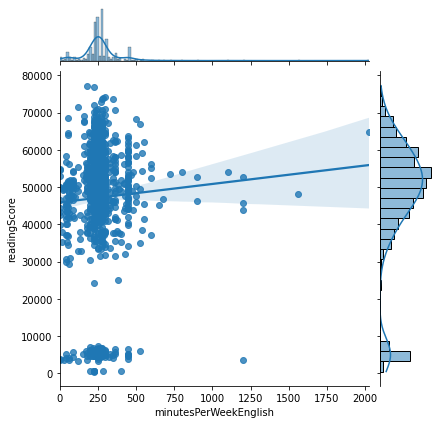

In [179]:
#Basit Doğrusal Regresyon (Temel amaç bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.)
#Öğrencilerin İngilizce Dersinde Geçirdikleri Haftalık Zamanın Okuma Puan Başarısı ile İlişkisi
dfDummies = dfDummies.dropna()
sns.jointplot(x="minutesPerWeekEnglish", y="readingScore", data=dfDummies, kind="reg");
X = dfDummies[["minutesPerWeekEnglish"]]
X.head()
y= dfDummies[["readingScore"]]
reg=LinearRegression()
model=reg.fit(X,y)

In [180]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
print("Sabit Sayı:\n",model.intercept_)
print("Kat Sayı:\n",model.coef_)

Sabit Sayı:
 [45899.28812501]
Kat Sayı:
 [[4.95578737]]


R2 Score

In [182]:
#R2 Score (Bağımlı değişkendeki değişikliğin bağımsız değişkenlerce açıklanma yüzdesi)
model.score(X,y)

0.001823988344548333

Formül Üzerinden Manuel Tahmin

In [183]:
45899.28812501 + 235 * 4.95578737

47063.89815696

Tahmin

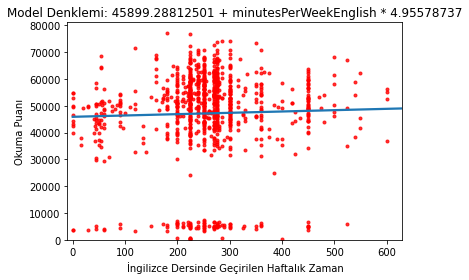

In [184]:
g = sns.regplot(dfDummies["minutesPerWeekEnglish"],dfDummies["readingScore"],ci=None, scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi: 45899.28812501 + minutesPerWeekEnglish * 4.95578737")
g.set_ylabel("Okuma Puanı")
g.set_xlabel("İngilizce Dersinde Geçirilen Haftalık Zaman")
plt.xlim(-10,630)
plt.ylim(bottom=0);

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state=1)

In [186]:
model.predict(X_test)[0:10]

array([[47386.02433642],
       [47014.34028357],
       [46375.04371266],
       [47138.23496785],
       [47138.23496785],
       [46989.56134671],
       [48129.39244213],
       [47262.12965214],
       [46716.99304128],
       [47237.35071528]])

Final

In [187]:
SLR_rmse= np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
SLR_rmse

15748.898505001918

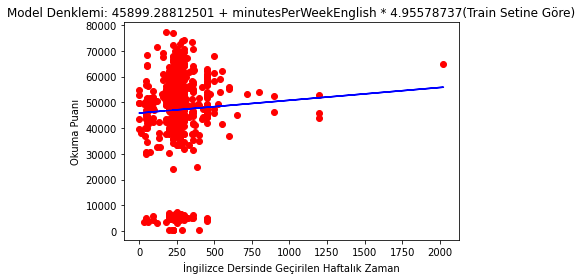

In [188]:
plt.scatter(X_train ,y_train, color='red')
plt.plot(X_train, reg.predict(X_train), color = 'blue')
plt.title('Model Denklemi: 45899.28812501 + minutesPerWeekEnglish * 4.95578737(Train Setine Göre)')
plt.xlabel('İngilizce Dersinde Geçirilen Haftalık Zaman')
plt.ylabel('Okuma Puanı')
plt.show()

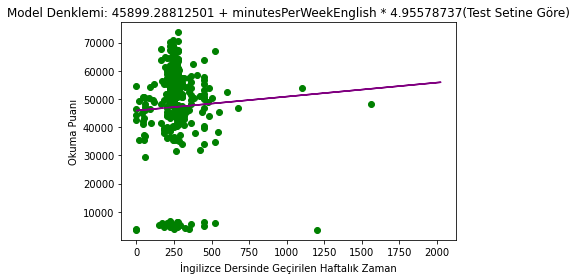

In [189]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, reg.predict(X_train),color='purple')
plt.title('Model Denklemi: 45899.28812501 + minutesPerWeekEnglish * 4.95578737(Test Setine Göre)')
plt.xlabel('İngilizce Dersinde Geçirilen Haftalık Zaman')
plt.ylabel('Okuma Puanı')
plt.show()

**Çoklu Doğrusal Regresyon**

In [190]:
#Çoklu Doğrusal Regresyon(Temel amaç bağımlı ve bağımsız değişkenler arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır)
#Okuldaki Öğrenci Sayısı, İngilizce Sınıfındaki Öğrenci Sayısı, İngilizce Dersinde Geçirilen Zamanın Okuma Başarısı ile İlişkisi

Scikit Learn ile Model Kurma

In [191]:
X = dfDummies[["studentsInEnglish","studentsInEnglish","schoolSize"]]
y = dfDummies[["readingScore"]]

In [192]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [193]:
lm = LinearRegression()
model = lm.fit(X,y)

In [194]:
model.intercept_

array([44996.69697417])

In [195]:
model.coef_

array([[49.08488316, 49.08488316, -0.14170199]])

Tahmin

In [196]:
y.head()

,readingScore
0,35524
4,4535
6,40513
7,66505
8,60484


In [197]:
model.predict(X)[0:10]
MSE = mean_squared_error(y,model.predict(X))
print(MSE)

271873221.23619294


In [198]:
RMSE = np.sqrt(MSE)
print(RMSE)

16488.57850865844


Model Tuning

In [199]:
X.head()

,studentsInEnglish,studentsInEnglish,schoolSize
0,30.0,30.0,808.0
4,30.0,30.0,808.0
6,30.0,30.0,808.0
7,35.0,35.0,808.0
8,30.0,30.0,808.0


In [200]:
y.head()

,readingScore
0,35524
4,4535
6,40513
7,66505
8,60484


Sınama Seti

In [201]:
X_train.head()

,studentsInEnglish,studentsInEnglish,schoolSize
1388,20.0,20.0,1347.0
1369,24.0,24.0,432.0
187,20.0,20.0,356.0
1046,24.0,24.0,3009.0
63,26.0,26.0,2640.0


In [202]:
y_train.head()

,readingScore
1388,61596
1369,48763
187,66116
1046,55224
63,51464


In [203]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Eğitim Hatası

In [204]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

16658.969718978227

Test Hatası


In [205]:
MLR_rmse= np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
MLR_rmse

15904.154579588494

K-Katlı Cross Validation

In [206]:
cross_val_score(model,X_train,y_train,cv=5,scoring="neg_mean_squared_error")

array([-2.65913226e+08, -3.24194288e+08, -2.48230596e+08, -2.87477844e+08,
       -2.72557429e+08])

CV MSE(Hata Kareler Ortalaması)

In [207]:
np.mean(-cross_val_score(model,X_train,y_train,cv=5,scoring="neg_mean_squared_error"))

279674676.5359925

CV RMSE(Hata Kareler Ortalaması Karakökü)

In [208]:
np.sqrt(np.mean(-cross_val_score(model,X_train,y_train,cv=5,scoring="neg_mean_squared_error")))

16723.476807649553

**Ridge Regresyon**

In [209]:
X = dfDummies[["raceeth_American Indian/Alaska Native", "raceeth_Asian", "raceeth_Black", "raceeth_Hispanic", "raceeth_More than one race", "raceeth_Native Hawaiian/Other Pacific Islander", "raceeth_White"]]
y = dfDummies[["readingScore"]]

In [210]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
X

,raceeth_American Indian/Alaska Native,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
6,1,0,0,0,0,0,0
7,0,0,0,0,0,0,1
8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
1562,0,0,0,0,0,0,1
1563,0,0,0,1,0,0,0
1565,0,0,0,0,0,0,1
1568,0,0,0,0,0,0,1


Model

In [211]:
ridge_model = Ridge(alpha=0.1).fit(X_train,y_train)

In [212]:
ridge_model.coef_

array([[-10991.75086227,    845.36891778,    317.7338856 ,
          2457.89343279,   3579.88118321,  -1933.31948972,
          5724.19293261]])

In [213]:
ridge_model.intercept_

array([43206.58587952])

Tahmin

In [214]:
ridge_model = Ridge().fit(X_train,y_train)
y_pred = ridge_model.predict(X_train)
y_pred[0:10]

array([[48920.05176755],
       [45652.34721397],
       [45652.34721397],
       [46691.27594305],
       [48920.05176755],
       [48920.05176755],
       [43524.06127991],
       [48920.05176755],
       [48920.05176755],
       [48920.05176755]])

In [215]:
y_train[0:10]

,readingScore
1443,60812
1397,6357
762,54006
181,46161
327,57373
81,45009
808,4344
582,62736
1381,53517
602,63762


Train Hatası

In [216]:
RMSE = np.sqrt(mean_squared_error(y_train,y_pred))
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train,y_train,cv=5,scoring="neg_mean_squared_error")))

16737.880240757015

Test Hatası

In [217]:
y_pred=ridge_model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

15938.425486468706

Model Tuning

In [218]:
ridge_model = Ridge().fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))
np.random.randint(0,1000,100)
lambdalar1 = np.random.randint(0,1000,100)
lambdalar2 = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = lambdalar2, scoring="neg_mean_squared_error",cv=5,normalize=True)
ridgecv.fit(X_train,y_train)
ridgecv.alpha_

1.7555958671075638

Final Modeli

In [219]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train,y_train)
y_pred = ridge_tuned.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
ridge_rmse

15918.94869481175

**Lasso Regresyon**

Model

In [220]:
lasso_model = Lasso().fit(X_train,y_train)
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [221]:
lasso_model.intercept_

array([44054.9206839])

In [222]:
lasso_model.coef_

array([-11911.2088951 ,     -0.        ,   -517.07111799,   1606.3663072 ,
         2718.62439137,  -2671.57494343,   4875.48019715])

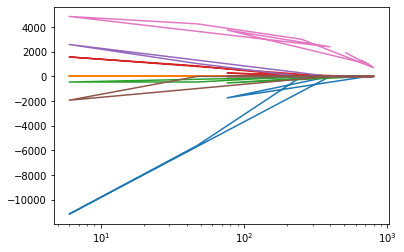

In [223]:
lasso = Lasso()
coefs = []
alphas = np.random.randint(0,1000,10)
for a in alphas:
  lasso.set_params(alpha = a)
  lasso.fit(X_train,y_train)
  coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

Tahmin

In [224]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [225]:
lasso_model.predict(X_train)[0:5]

array([48930.40088106, 45661.28699111, 45661.28699111, 46773.54507528,
       48930.40088106])

In [226]:
lasso_model.predict(X_test)[0:5]

array([48930.40088106, 48930.40088106, 45661.28699111, 48930.40088106,
       48930.40088106])

In [227]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

15972.725114512466

In [228]:
r2_score(y_test,y_pred) #Bağımsız değişkenlerce bağımlı değişkeni açıklama yüzdesi

-0.012233064170065422

Model Tuning

In [229]:
alphas = 10**np.linspace(10,-2,100)*0.5
lasso_cv_model = LassoCV(alphas=alphas,cv=5,max_iter=10000).fit(X_train,y_train)
lasso_cv_model.alpha_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


266.8349615603151

In [230]:
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)
lasso_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
lasso_rmse

15851.217549728502

In [231]:
pd.Series(lasso_tuned.coef_,index=X_train.columns)

raceeth_American Indian/Alaska Native               -0.000000
raceeth_Asian                                       -0.000000
raceeth_Black                                       -0.000000
raceeth_Hispanic                                     0.000000
raceeth_More than one race                           0.000000
raceeth_Native Hawaiian/Other Pacific Islander      -0.000000
raceeth_White                                     2948.924235
dtype: float64

**ElasticNet Regresyon**

Model

In [232]:
enet_model = ElasticNet().fit(X_train,y_train)
enet_model.coef_

array([-194.19572295, -221.61753119, -422.56403401, -312.42492023,
          5.54136045,  -71.65445305, 1219.90814012])

In [233]:
enet_model.intercept_

array([46711.73981555])

Tahmin

In [234]:
enet_model.predict(X_train)[0:10]

array([47931.64795567, 46399.31489531, 46399.31489531, 46717.281176  ,
       47931.64795567, 47931.64795567, 46289.17578154, 47931.64795567,
       47931.64795567, 47931.64795567])

In [235]:
enet_model.predict(X_test)[0:10]

array([47931.64795567, 47931.64795567, 46399.31489531, 47931.64795567,
       47931.64795567, 46490.12228435, 47931.64795567, 47931.64795567,
       47931.64795567, 47931.64795567])

In [236]:
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

15844.513305955355

In [237]:
r2_score(y_test,y_pred)

0.003951946597188116

Model Tuning

In [238]:
enet_cv_model = ElasticNetCV(cv=5).fit(X_train,y_train)
enet_cv_model.alpha_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.9364887631518086

In [239]:
enet_cv_model.intercept_

46955.3048157915

In [240]:
enet_cv_model.coef_

array([-102.12834439, -129.78905947, -250.60612824, -232.29679271,
         -5.31319198,  -38.43972267,  763.57052978])

Final

In [241]:
enet_tuned = ElasticNet(alpha=enet_cv_model.alpha_).fit(X_train,y_train)
y_pred = enet_tuned.predict(X_test)
enet_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
enet_rmse

15855.921177036107

**LDA**

In [242]:
X_train.shape

(744, 7)

In [243]:
X_test.shape

(248, 7)

In [244]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [245]:
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.fit_transform(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [246]:
cls = LogisticRegression(random_state=0)
cls.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [247]:
y_pred = cls.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.0

**Ridge Regresyon LDA Sonrası**

In [336]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
X

,grade,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore,raceeth_American Indian/Alaska Native,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,10,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,35524,0,0,0,0,0,0,1
4,10,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,4535,0,0,0,0,0,0,1
6,10,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,240.0,30.0,1.0,1,0,808.0,40513,1,0,0,0,0,0,0
7,10,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,270.0,35.0,1.0,1,0,808.0,66505,0,0,0,0,0,0,1
8,11,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,270.0,30.0,1.0,1,0,808.0,60484,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,270.0,25.0,1.0,1,1,2999.0,6672,0,0,0,0,0,0,1
1563,10,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,270.0,28.0,1.0,1,1,2999.0,54176,0,0,0,1,0,0,0
1565,9,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,300.0,20.0,1.0,1,0,987.0,46558,0,0,0,0,0,0,1
1568,10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,450.0,20.0,1.0,1,0,987.0,59634,0,0,0,0,0,0,1


Model

In [337]:
ridge_model = Ridge(alpha=0.1).fit(X_train,y_train)

In [338]:
ridge_model.coef_

array([-3.87763174e-02,  2.18330647e-02, -8.89418563e-02,  9.09584234e-02,
       -2.03572147e-02, -4.86961977e-02, -1.15302742e-02,  4.00967456e-03,
        7.15510927e-02,  2.02846418e-02, -1.66342520e-01,  1.20714865e-01,
       -5.50920177e-03, -1.32626606e-01, -1.77701259e-01,  1.27600664e-04,
       -1.15041736e-03,  2.03868243e-02, -2.04607307e-01, -2.99226986e-02,
        4.16724135e-06, -3.25224766e-07,  1.09088908e-01, -5.18125447e-02,
        6.15142479e-02,  8.66102413e-02,  2.02400261e-02, -2.89418215e-01,
        6.37773365e-02])

In [339]:
ridge_model.intercept_

1.1612978561992706

Tahmin

In [340]:
ridge_model = Ridge().fit(X_train,y_train)
y_pred = ridge_model.predict(X_train)
y_pred[0:10]

array([0.68076121, 0.50160847, 0.3478402 , 0.67063308, 0.54344142,
       0.56824102, 0.4516519 , 0.56425338, 0.2907523 , 0.44420204])

In [341]:
y_train[0:10]

1443    1
1397    1
762     1
181     0
327     1
81      0
808     1
582     1
1381    0
602     1
Name: male, dtype: int64

Train Hatası

In [342]:
RMSE = np.sqrt(mean_squared_error(y_train,y_pred))
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train,y_train,cv=5,scoring="neg_mean_squared_error")))

0.499310087947492

Test Hatası

In [343]:
y_pred=ridge_model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

0.49168876676522516

Model Tuning

In [344]:
ridge_model = Ridge().fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))
np.random.randint(0,1000,100)
lambdalar1 = np.random.randint(0,1000,100)
lambdalar2 = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = lambdalar2, scoring="neg_mean_squared_error",cv=5,normalize=True)
ridgecv.fit(X_train,y_train)
ridgecv.alpha_

0.7599555414764666

Final Modeli

In [345]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train,y_train)
y_pred = ridge_tuned.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
ridge_rmse

0.49170943558242675

**Lasso Regresyon LDA Sonrası**

Model

In [346]:
lasso_model = Lasso().fit(X_train,y_train)
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [347]:
lasso_model.intercept_

0.5367151004604939

In [348]:
lasso_model.coef_

array([-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  4.29207007e-05,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.24280005e-05, -6.98458609e-07,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00])

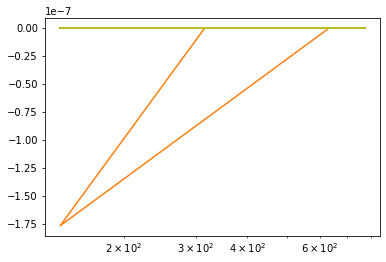

In [349]:
lasso = Lasso()
coefs = []
alphas = np.random.randint(0,1000,10)
for a in alphas:
  lasso.set_params(alpha = a)
  lasso.fit(X_train,y_train)
  coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

Tahmin

In [350]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [351]:
lasso_model.predict(X_train)[0:5]

array([0.49568894, 0.51172164, 0.44792415, 0.5091895 , 0.49404332])

In [352]:
lasso_model.predict(X_test)[0:5]

array([0.46177407, 0.48798545, 0.48018352, 0.4395508 , 0.4971946 ])

In [353]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.5002589918805177

In [354]:
r2_score(y_test,y_pred) #Bağımsız değişkenlerce bağımlı değişkeni açıklama yüzdesi

-0.0026664817999157986

Model Tuning

In [355]:
alphas = 10**np.linspace(10,-2,100)*0.5
lasso_cv_model = LassoCV(alphas=alphas,cv=5,max_iter=10000).fit(X_train,y_train)
lasso_cv_model.alpha_

0.006609705742330144

In [356]:
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)
lasso_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
lasso_rmse

0.4957433807561555

In [357]:
pd.Series(lasso_tuned.coef_,index=X_train.columns)

grade                                            -1.470323e-02
preschool                                         0.000000e+00
expectBachelors                                  -4.940714e-02
motherHS                                          0.000000e+00
motherBachelors                                  -0.000000e+00
motherWork                                       -3.051535e-02
fatherHS                                         -0.000000e+00
fatherBachelors                                   0.000000e+00
fatherWork                                        0.000000e+00
selfBornUS                                        0.000000e+00
motherBornUS                                     -0.000000e+00
fatherBornUS                                      0.000000e+00
englishAtHome                                    -0.000000e+00
computerForSchoolwork                            -1.056343e-02
read30MinsADay                                   -1.549537e-01
minutesPerWeekEnglish                             1.125

**ElasticNet Regresyon LDA Sonrası**

Model

In [358]:
enet_model = ElasticNet().fit(X_train,y_train)
enet_model.coef_

array([-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  6.67092389e-05,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.30851679e-05, -7.10733555e-07,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00])

In [359]:
enet_model.intercept_

0.5318668863055586

Tahmin

In [360]:
enet_model.predict(X_train)[0:10]

array([0.49520616, 0.51126261, 0.44902773, 0.51010884, 0.49517398,
       0.51144737, 0.51332222, 0.47133152, 0.50381877, 0.46924335])

In [361]:
enet_model.predict(X_test)[0:10]

array([0.46190364, 0.48718371, 0.47618277, 0.43796215, 0.49718211,
       0.44989586, 0.49353344, 0.47539476, 0.50126336, 0.51505849])

In [362]:
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.5005042765792322

In [363]:
r2_score(y_test,y_pred)

-0.0036499685284792083

Model Tuning

In [364]:
enet_cv_model = ElasticNetCV(cv=5).fit(X_train,y_train)
enet_cv_model.alpha_

378.56919875130063

In [365]:
enet_cv_model.intercept_

0.48387096774193555

In [366]:
enet_cv_model.coef_

array([-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -7.01085256e-22,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00])

Final

In [367]:
enet_tuned = ElasticNet(alpha=enet_cv_model.alpha_).fit(X_train,y_train)
y_pred = enet_tuned.predict(X_test)
enet_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
enet_rmse

0.5009096823635334

***DOĞRUSAL OLMAYAN REGRESYON MODELLERİ***

**OTONOM GÖSTERİM**

In [248]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Proje/pisa2009test.xlsx")
df = df.dropna()
dms=pd.get_dummies(df,columns=['raceeth'],prefix=["raceeth"])

In [249]:
dms

,grade,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore,male,raceeth_American Indian/Alaska Native,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,10,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,35524,0,0,0,0,0,0,0,1
4,10,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,4535,0,0,0,0,0,0,0,1
6,10,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,240.0,30.0,1.0,1,0,808.0,40513,0,1,0,0,0,0,0,0
7,10,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,270.0,35.0,1.0,1,0,808.0,66505,0,0,0,0,0,0,0,1
8,11,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,270.0,30.0,1.0,1,0,808.0,60484,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,270.0,25.0,1.0,1,1,2999.0,6672,0,0,0,0,0,0,0,1
1563,10,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,270.0,28.0,1.0,1,1,2999.0,54176,0,0,0,0,1,0,0,0
1565,9,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,300.0,20.0,1.0,1,0,987.0,46558,1,0,0,0,0,0,0,1
1568,10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,450.0,20.0,1.0,1,0,987.0,59634,0,0,0,0,0,0,0,1


In [375]:
def CompML(dataset,bagimli_degisken,algoritma):
  #Train-Test Ayrımı
  X = dms[["raceeth_American Indian/Alaska Native", "raceeth_Asian", "raceeth_Black", "raceeth_Hispanic", "raceeth_More than one race", "raceeth_Native Hawaiian/Other Pacific Islander", "raceeth_White"]]
  y = dms[[bagimli_degisken]]
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
  #Modelleme
  model = algoritma().fit(X_train,y_train)
  y_pred = model.predict(X_test)
  RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
  model_ismi = algoritma.__name__
  print(model_ismi,":",RMSE)


In [376]:
models=[LGBMRegressor,XGBRegressor,GradientBoostingRegressor,RandomForestRegressor,DecisionTreeRegressor,MLPRegressor,KNeighborsRegressor,SVR, CatBoostRegressor]
for i in models:
  CompML(df,"readingScore",i)

LGBMRegressor : 15691.950990561025
[12:05:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor : 15760.25460882012
GradientBoostingRegressor : 15760.307959363348


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomForestRegressor : 15728.827645250014
DecisionTreeRegressor : 15760.452517306383


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor : 49641.19233143191
KNeighborsRegressor : 16751.92381837631
SVR : 16069.88571194882
Learning rate set to 0.037452
0:	learn: 16694.5507349	total: 437us	remaining: 437ms
1:	learn: 16685.3248852	total: 745us	remaining: 372ms
2:	learn: 16676.2165702	total: 958us	remaining: 319ms
3:	learn: 16668.0455534	total: 1.16ms	remaining: 288ms
4:	learn: 16659.6216883	total: 1.39ms	remaining: 277ms
5:	learn: 16651.7157540	total: 1.63ms	remaining: 270ms
6:	learn: 16644.5389167	total: 1.87ms	remaining: 265ms
7:	learn: 16638.5243397	total: 2.08ms	remaining: 258ms
8:	learn: 16633.1134755	total: 2.29ms	remaining: 252ms
9:	learn: 16628.3849314	total: 2.49ms	remaining: 246ms
10:	learn: 16622.4369928	total: 2.78ms	remaining: 250ms
11:	learn: 16617.8991325	total: 2.97ms	remaining: 245ms
12:	learn: 16613.3310067	total: 3.19ms	remaining: 242ms
13:	learn: 16608.3360342	total: 3.47ms	remaining: 245ms
14:	learn: 16607.9160302	total: 3.64ms	remaining: 239ms
15:	learn: 16604.9507493	total: 3.85ms	remaini

***SINIFLANDIRMA PROBLEMLERİ***

**LOJİSTİK REGRESYON**

In [252]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Proje/pisa2009test.xlsx")
df.head()

,grade,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore,male
0,10,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,35524,0
1,10,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,38557,1
2,10,White,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,52262,0
3,10,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,40624,0
4,10,White,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,4535,0


In [253]:
df = df.dropna()

In [254]:
dfDummies=pd.get_dummies(df,columns=['raceeth'],prefix=["raceeth"])
dfDummies.head()

,grade,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore,male,raceeth_American Indian/Alaska Native,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,10,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,35524,0,0,0,0,0,0,0,1
4,10,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,4535,0,0,0,0,0,0,0,1
6,10,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,240.0,30.0,1.0,1,0,808.0,40513,0,1,0,0,0,0,0,0
7,10,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,270.0,35.0,1.0,1,0,808.0,66505,0,0,0,0,0,0,0,1
8,11,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,270.0,30.0,1.0,1,0,808.0,60484,0,0,0,0,0,0,0,1


In [255]:
dfDummies["male"].value_counts()
dfDummies.describe().T
y = dfDummies["male"]
X = dfDummies.drop(["male"],axis=1)
y.head()

0    0
4    0
6    0
7    0
8    0
Name: male, dtype: int64

In [256]:
X.head()

,grade,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore,raceeth_American Indian/Alaska Native,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,10,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,35524,0,0,0,0,0,0,1
4,10,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,4535,0,0,0,0,0,0,1
6,10,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,240.0,30.0,1.0,1,0,808.0,40513,1,0,0,0,0,0,0
7,10,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,270.0,35.0,1.0,1,0,808.0,66505,0,0,0,0,0,0,1
8,11,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,270.0,30.0,1.0,1,0,808.0,60484,0,0,0,0,0,0,1


In [257]:
loj_model = LogisticRegression(solver="liblinear").fit(X,y)
loj_model.intercept_

array([0.21151949])

In [258]:
loj_model.coef_

array([[ 4.73420073e-02,  1.08013380e-01, -4.06793993e-01,
         3.55204966e-01, -1.35708303e-01, -1.73052809e-02,
         1.20330058e-01,  1.02709979e-01,  2.37890890e-01,
         1.37682217e-01, -5.38541619e-01,  4.06273202e-01,
         3.24706424e-02, -4.50449746e-01, -5.77409133e-01,
         2.18502255e-04, -6.32176724e-03,  1.24555904e-01,
        -5.71308995e-01, -1.61928569e-01,  2.49778448e-05,
        -2.99883111e-06,  1.38383919e-01, -1.08987776e-01,
        -1.30519680e-01,  2.82152982e-01,  1.62911130e-02,
        -1.21675780e-01,  1.35874715e-01]])

In [259]:
loj_model.predict(X)[0:10]

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [260]:
y[0:10]

0     0
4     0
6     0
7     0
8     0
9     1
10    0
12    1
13    1
14    0
Name: male, dtype: int64

In [261]:
y_pred = loj_model.predict(X)
confusion_matrix(y,y_pred)

array([[291, 212],
       [184, 305]])

In [262]:
accuracy_score(y,y_pred)

0.6008064516129032

In [263]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.58      0.60       503
           1       0.59      0.62      0.61       489

    accuracy                           0.60       992
   macro avg       0.60      0.60      0.60       992
weighted avg       0.60      0.60      0.60       992



In [264]:
loj_model.predict_proba(X)[0:10]

array([[0.45798187, 0.54201813],
       [0.41381387, 0.58618613],
       [0.56669458, 0.43330542],
       [0.53825028, 0.46174972],
       [0.54916699, 0.45083301],
       [0.61179587, 0.38820413],
       [0.49029213, 0.50970787],
       [0.37947524, 0.62052476],
       [0.47437665, 0.52562335],
       [0.55243327, 0.44756673]])

Model Tuning

In [265]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=1)
loj_cv_model = LogisticRegression(solver="liblinear").fit(X_train,y_train)
y_pred = loj_model.predict(X_test)
print(accuracy_score(y_test,y_pred)) 

0.6048387096774194


In [266]:
cross_val_score(loj_model,X_test,y_test,cv=5,n_jobs = -1,verbose=2).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


0.5238367346938776

**K-EN YAKIN KOMŞU**

Model & Tahmin

In [267]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=1)
knn_model = KNeighborsClassifier().fit(X_train,y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [268]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.4838709677419355

In [269]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.44      0.45       119
           1       0.50      0.53      0.52       129

    accuracy                           0.48       248
   macro avg       0.48      0.48      0.48       248
weighted avg       0.48      0.48      0.48       248



Model Tuning

In [270]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors":np.arange(1,50)}
knn_cv_model = GridSearchCV(knn,knn_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    2.6s finished


In [271]:
knn_cv_model.best_score_

0.5658534373299474

In [272]:
knn_cv_model.best_params_

{'n_neighbors': 31}

Final

In [273]:
knn_tuned = KNeighborsClassifier(n_neighbors=31).fit(X_train,y_train)
y_pred=knn_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.4717741935483871

In [274]:
knn_tuned.score(X_test,y_test)

0.4717741935483871

**DESTEK VEKTÖR MAKİNELERİ(SVM)**

---



Model & Tahmin

In [275]:
svm = SVC()
svm_model = SVC().fit(X_train,y_train)
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [276]:
y_pred = svm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.49193548387096775

In [277]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.48      0.47       119
           1       0.51      0.50      0.51       129

    accuracy                           0.49       248
   macro avg       0.49      0.49      0.49       248
weighted avg       0.49      0.49      0.49       248



Model Tuning

In [278]:
svm_params={"C":np.arange(1,10),"kernel":["rbf"]} #Gönül daha iyisi olsun, hem linear hem rbf aynı anda karşılaştırmasını yapayım isterdi ama makinenin gücü yetmedi
svm_cv_model=GridSearchCV(svm,svm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.2s finished


In [279]:
svm_cv_model.best_score_

0.5417105024487576

In [280]:
svm_cv_model.best_params_

{'C': 8, 'kernel': 'rbf'}

Final

In [281]:
svm_tuned = SVC(C=8,kernel="rbf").fit(X_train,y_train)
y_pred=svm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.5

**Yapay Sinir Ağları**

Model & Tahmin

In [282]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=1)

In [283]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
mlpc_model = MLPClassifier().fit(X_train,y_train)
mlpc_model.coefs_

In [ ]:
#?mlpc_model

In [285]:
y_pred = mlpc_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.5483870967741935

In [286]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.61      0.57       119
           1       0.58      0.49      0.53       129

    accuracy                           0.55       248
   macro avg       0.55      0.55      0.55       248
weighted avg       0.55      0.55      0.55       248



Model Tuning

In [287]:
mlpc_params = {"alpha":[0.1,0.001,0.03,0.05,0.0001,1,5],"hidden_layer_sizes":[(10,10),(100,100),(100,100,100),(3,5)]}
mlpc = MLPClassifier(solver="lbfgs")
mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  1.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [288]:
mlpc_cv_model

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={

In [289]:
mlpc_cv_model.best_params_

{'alpha': 1, 'hidden_layer_sizes': (100, 100, 100)}

Final

In [290]:
mlpc_tuned = MLPClassifier(solver="lbfgs",alpha=0.05,hidden_layer_sizes=(3,5)).fit(X_train,y_train)
y_pred=mlpc_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5443548387096774

**CART(Classification and Regression Trees)**

Model & Tahmin

In [291]:
cart_model=DecisionTreeClassifier().fit(X_train,y_train)
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [292]:
y_pred=cart_model.predict(X_test)
accuracy_score(y_test,y_pred) #İlkel Test Tahmini

0.5040322580645161

In [293]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.50      0.49       119
           1       0.52      0.50      0.51       129

    accuracy                           0.50       248
   macro avg       0.50      0.50      0.50       248
weighted avg       0.50      0.50      0.50       248



In [ ]:
#?cart_model

Model Tuning

In [294]:
cart=DecisionTreeClassifier()
cart_params={"max_depth":[1,3,5,8,10],"min_samples_split":[2,3,5,10,20,50]}
cart_cv_model=GridSearchCV(cart,cart_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.6s finished


In [295]:
cart_cv_model.best_params_

{'max_depth': 10, 'min_samples_split': 50}

Final

In [296]:
cart_tuned=DecisionTreeClassifier(max_depth=10,min_samples_split=50).fit(X_train,y_train)
y_pred=cart_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.5201612903225806

**Random Forest**

Model & Tahmin

In [297]:
rf_model=RandomForestClassifier().fit(X_train,y_train)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [298]:
y_pred=rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.5443548387096774

In [299]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.65      0.58       119
           1       0.58      0.45      0.51       129

    accuracy                           0.54       248
   macro avg       0.55      0.55      0.54       248
weighted avg       0.55      0.54      0.54       248



In [300]:
#?rf_model

Model Tuning

In [301]:
X_train.shape

(744, 29)

In [302]:
rf=RandomForestClassifier()
rf_params={"n_estimators":[100,200,500],"max_features":[3,5,7],"min_samples_split":[2,5,10]}
rf_cv_model=GridSearchCV(rf,rf_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)
rf_cv_model.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   57.8s finished


{'max_features': 7, 'min_samples_split': 10, 'n_estimators': 100}

Final

In [303]:
rf_tuned=RandomForestClassifier(max_features=7,min_samples_split=2,n_estimators=100).fit(X_train,y_train)
y_pred=rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.5483870967741935

**Gradient Boosting Machines(GBM)**

Model & Tahmin

In [307]:
gbm_model=GradientBoostingClassifier().fit(X_train,y_train)

In [308]:
gbm_model
y_pred=gbm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.5604838709677419

In [309]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.52      0.53       119
           1       0.57      0.60      0.59       129

    accuracy                           0.56       248
   macro avg       0.56      0.56      0.56       248
weighted avg       0.56      0.56      0.56       248



Model Tuning

In [310]:
gbm=GradientBoostingClassifier()
gbm_params={"learning_rate":[0.1,0.001,0.0001],"n_estimators":[100,200,500],"max_depth":[2,5,8]}
gbm_cv_model=GridSearchCV(gbm,gbm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.2min finished


In [311]:
gbm_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 500}

Final

In [312]:
gbm_tuned=GradientBoostingClassifier(learning_rate=0.001,max_depth=5,n_estimators=500).fit(X_train,y_train)
y_pred=gbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.5564516129032258

**XGBOOST(eXtreme Gradient Boosting)**

Model & Tahmin

In [314]:
xgb_model=XGBClassifier().fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.5080645161290323

In [315]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.52      0.50       119
           1       0.53      0.50      0.51       129

    accuracy                           0.51       248
   macro avg       0.51      0.51      0.51       248
weighted avg       0.51      0.51      0.51       248



Model Tuning

In [316]:
xgb=XGBClassifier()
xgb_params={"n_estimator":[100,500],"subsample":[0.6,1],"max_depth":[3,7],"learning_rate":[0.1,0.01]}
xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    7.4s finished


In [317]:
xgb_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimator': 100, 'subsample': 1}

Final

In [318]:
xgb_tuned=XGBClassifier(learning_rate=0.01,max_depth=7,n_estimators=100,subsample=1).fit(X_train,y_train)
y_pred=xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.5443548387096774

**Light GBM**

Model & Tahmin

In [319]:
lgbm_model=LGBMClassifier().fit(X_train,y_train)
y_pred=lgbm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.5282258064516129

In [320]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.57      0.54       119
           1       0.55      0.49      0.52       129

    accuracy                           0.53       248
   macro avg       0.53      0.53      0.53       248
weighted avg       0.53      0.53      0.53       248



Model Tuning

In [321]:
lgbm=LGBMClassifier()
lgbm_params={"learning_rate":[0.01,0.001,0.1],"n_estimators":[100,200,300],"max_depth":[1,2,23,8]}
lgbm_cv_model=GridSearchCV(lgbm,lgbm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   10.0s finished


In [322]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}

Final

In [323]:
lgbm_tuned=LGBMClassifier(learning_rate=0.1,max_depth=1,n_estimators=200).fit(X_train,y_train)
y_pred=lgbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.5483870967741935

**CatBoost(Category Boosting)**

Model & Tahmin

In [377]:
catb_model=CatBoostClassifier().fit(X_train,y_train,verbose=False)
y_pred=catb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.5806451612903226

In [325]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57       119
           1       0.60      0.56      0.58       129

    accuracy                           0.58       248
   macro avg       0.58      0.58      0.58       248
weighted avg       0.58      0.58      0.58       248



Model Tuning

In [ ]:
catb=CatBoostClassifier()
catb_params={"iterations":[200,500,1000],"learning_rate":[0.01,0.03,0.1],"depth":[4,5,8]}
catb_cv_model=GridSearchCV(catb,catb_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.4s


In [327]:
catb_cv_model.best_params_

{'depth': 4, 'iterations': 200, 'learning_rate': 0.01}

Final

In [ ]:
catb_tuned=CatBoostClassifier(depth=4,iterations=200,learning_rate=0.01).fit(X_train,y_train)
y_pred=cart_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

**KARŞILAŞTIRMA**


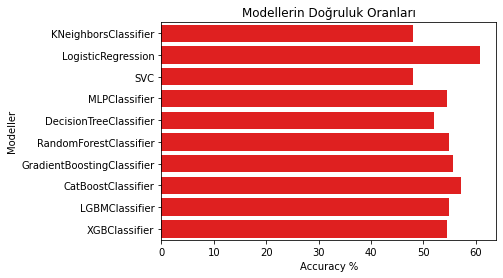

In [333]:
modeller=[knn_tuned,loj_model,svm_tuned,mlpc_tuned,cart_tuned,rf_tuned,gbm_tuned,catb_tuned,lgbm_tuned,xgb_tuned]
sonuc=[]
sonuclar=pd.DataFrame(columns=["Modeller","Accuracy"])
for model in modeller:
  isimler=model.__class__.__name__
  y_pred=model.predict(X_test)
  dogruluk=accuracy_score(y_test,y_pred)
  sonuc=pd.DataFrame([[isimler,dogruluk*100]],columns=["Modeller","Accuracy"])
  sonuclar=sonuclar.append(sonuc)
sns.barplot(x="Accuracy",y="Modeller",data=sonuclar,color="r")
plt.xlabel("Accuracy %")
plt.title("Modellerin Doğruluk Oranları");